In [1]:
import numpy as np #arry manipulation library
import matplotlib.pyplot as plt #graphing library
import tflearn #import ML library
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.conv import conv_2d, max_pool_2d #convolution, max pooling
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist #import data

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [2]:
x,y,test_x,test_y = mnist.load_data(one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


One Hot Encoding with 10

0 -> [1,0,0,0,0,0,0,0,0,0]
<br>
1 -> [0,1,0,0,0,0,0,0,0,0]
<br>
2 -> [0,0,1,0,0,0,0,0,0,0]
<br>
3 -> [0,0,0,1,0,0,0,0,0,0]
<br>
4 -> [0,0,0,0,1,0,0,0,0,0]
<br>
5 -> [0,0,0,0,0,1,0,0,0,0]
<br>
6 -> [0,0,0,0,0,0,1,0,0,0]
<br>
7 -> [0,0,0,0,0,0,0,1,0,0]
<br>
8 -> [0,0,0,0,0,0,0,0,1,0]
<br>
9 -> [0,0,0,0,0,0,0,0,0,1]

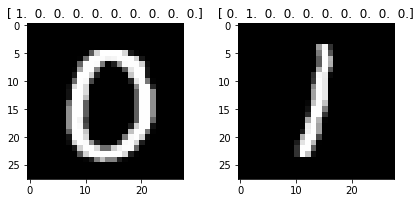

In [3]:
image1 = x[10]
image2 = x[4]
image1 = np.array(image1)
image2 = np.array(image2)
image1 = image1.reshape(28,28)
image2 = image2.reshape(28,28)
plt.subplot(121)
plt.title('{label}'.format(label=y[10]))
plt.imshow(image1, cmap='gray')
plt.subplot(122)
plt.title('{label}'.format(label=y[4]))
plt.imshow(image2, cmap='gray')
plt.tight_layout()
plt.show()

In [5]:
print(x.shape[0])

55000


In [6]:
x = x.reshape([-1, 28, 28, 1])
test_x = test_x.reshape([-1, 28, 28, 1])

In [7]:
print(x.shape)

(55000, 28, 28, 1)


<center>
    <h1>Architecture</h1>
    <img src="http://www.pyimagesearch.com/wp-content/uploads/2014/06/cnn_architecture.jpg" height="900" width="900">
</center>
<br>

In [8]:
# Building the convolutional neural network
network = input_data(shape=[None, 28, 28, 1],name='input') #input layer

network = conv_2d(network, nb_filter=4, filter_size=5, activation='relu')  #conv layer with 4 5x5 conv kernels and rectifier activiation
network = max_pool_2d(network, 2) #max pool subsampling layer with 2x2 sampling window 

network = conv_2d(network, nb_filter=4, filter_size=5, activation='relu')  #conv layer with 4 5x5 conv kernels and rectifier activiation
network = max_pool_2d(network, 2) #max pool subsampling layer with 2x2 sampling window 

network = fully_connected(network, 128, activation='tanh') #fully connected layer with 128 neurons and tanh activation function

network = fully_connected(network, 10, activation='softmax') #output layer with 10 neurons and softmax activation function

network = regression(network, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name='target') #regression layer with adam optimizer and crossentropy loss function

model = tflearn.DNN(network, tensorboard_verbose=0)

<h1>Training</h1>

In [9]:
model.fit({'input': x}, {'target': y}, n_epoch=5,
           validation_set=({'input': test_x}, {'target': test_y}), show_metric=True, run_id='convnet_mnist')

Training Step: 4299  | total loss: 0.23708 | time: 20.230s
| Adam | epoch: 005 | loss: 0.23708 - acc: 0.9455 -- iter: 54976/55000
Training Step: 4300  | total loss: 0.22711 | time: 21.798s
| Adam | epoch: 005 | loss: 0.22711 - acc: 0.9478 | val_loss: 0.10935 - val_acc: 0.9657 -- iter: 55000/55000
--


<h1>Testing</h1>

Create a test image: http://www.onemotion.com/flash/sketch-paint/

In [ ]:
from scipy import misc 

image = misc.imread("test2.png", flatten=True)  
print(image.shape)
print(image.dtype)
#image = 1 - image
image = image.reshape(28,28)
plt.imshow(image, cmap='gray')
plt.show()

image = image.reshape([-1,28,28,1])

predict = model.predict({'input': image})

print(np.round_(predict, decimals=3))
print("prediction: " + str(np.argmax(predict)))

<h1>References</h1>
<br>
https://github.com/tflearn/tflearn/blob/master/examples/images/convnet_mnist.py
<br>
https://www.youtube.com/watch?v=FmpDIaiMIeA